In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data_cardio=pd.read_csv('Datos/cardio_train.csv',sep=";")
data_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


De la tabla se puede observar que:
1. La edad se encuentra en días, no en años.
2. Los valores de la presión sistólica (ap_hi) y diastólica (ap_lo) tienen como mínimo y máximo valores que no tienen sentido.

In [19]:
data_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
#Comprobar si hay valores nulos en el dataframe
data_cardio.isna().sum() 

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [22]:
def limpia_edad(x):
    edad=x/365
    return int(round(edad))

In [127]:
data_cardio['age']=data_cardio['age'].apply(limpia_edad)
data_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [31]:
data_cardio['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [33]:
cardio_disease=data_cardio[data_cardio['cardio']==1]
cardio_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
7,12,62,2,178,95.0,130,90,3,3,0,0,1,1
15,24,46,2,172,112.0,120,80,1,1,0,0,0,1


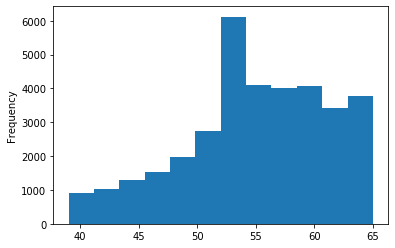

In [40]:
cardio_disease['age'].plot.hist(bins=12)

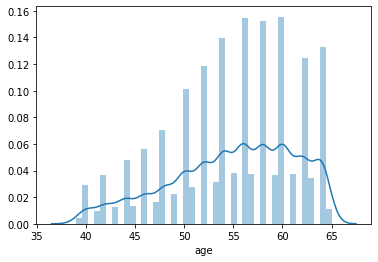

In [41]:
ax = sns.distplot(cardio_disease['age'])

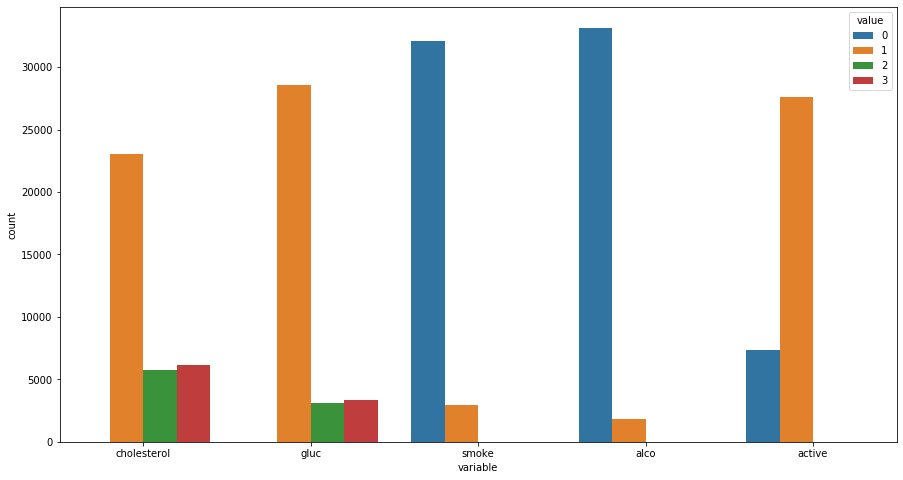

In [45]:
plt.figure(figsize=(15,8))
df_aux= cardio_disease.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_aux));

In [46]:
cardio_healthy=data_cardio[data_cardio['cardio']==0]

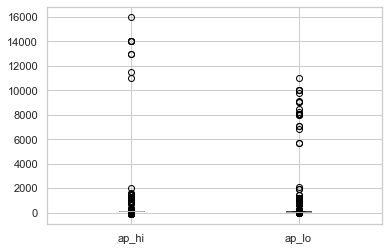

In [58]:
data_cardio.boxplot(column=['ap_hi', 'ap_lo'])

In [90]:
data_cardio.drop(data_cardio[(data_cardio.ap_hi > 250) | (data_cardio.ap_lo > 140)].index, inplace=True)

In [91]:
data_cardio.drop(data_cardio[(data_cardio.ap_hi < 80) | (data_cardio.ap_lo < 60)].index, inplace=True)

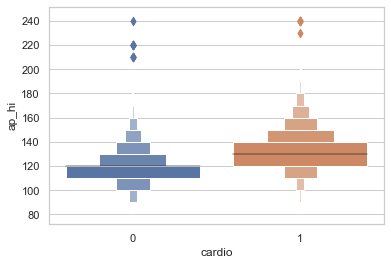

In [92]:
sns.boxenplot(data_cardio['cardio'],data_cardio['ap_hi'])
plt.show()

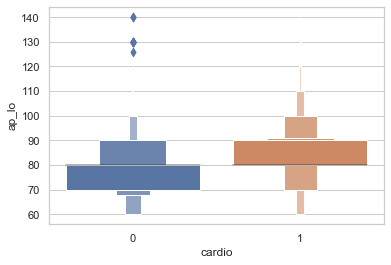

In [93]:
sns.boxenplot(data_cardio['cardio'],data_cardio['ap_lo'])
plt.show()

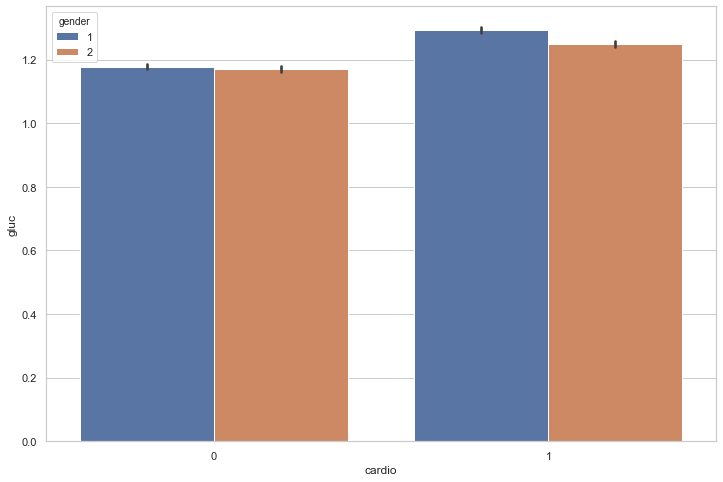

In [115]:
plt.figure(figsize=(12,8))
sns.barplot(x='cardio',y='gluc',hue="gender",data=data_cardio)
plt.show()

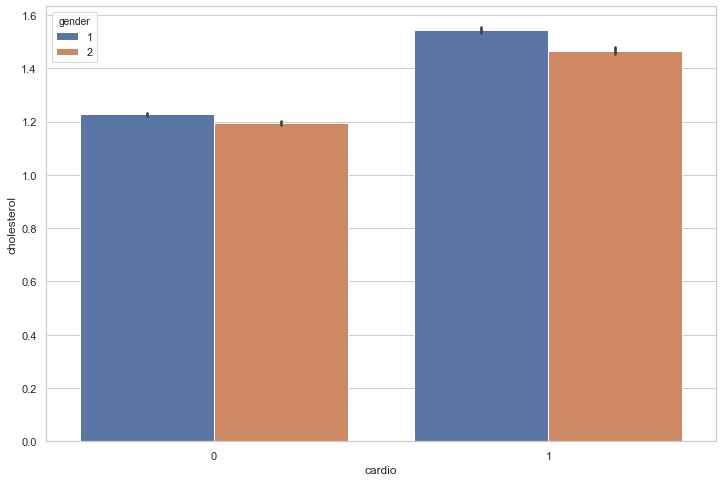

In [114]:
plt.figure(figsize=(12,8))
sns.barplot(x='cardio',y='cholesterol',hue="gender",data=data_cardio)
plt.show()

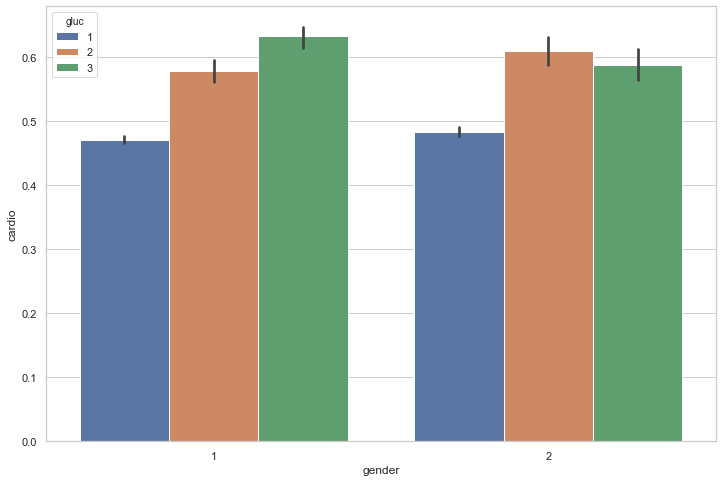

In [123]:
plt.figure(figsize=(12,8))
sns.barplot(x='gender',y='cardio',hue="gluc",data=data_cardio)
plt.show()

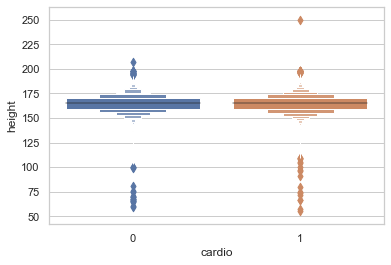

In [125]:
sns.boxenplot(data_cardio['cardio'],data_cardio['height'])
plt.show()

In [128]:
data_cardio['age'].min()

30

In [135]:
data_cardio[data_cardio['height']<=100].count()

id             29
age            29
gender         29
height         29
weight         29
ap_hi          29
ap_lo          29
cholesterol    29
gluc           29
smoke          29
alco           29
active         29
cardio         29
dtype: int64

In [137]:
data_cardio.shape

(68620, 13)

In [138]:
data_cardio.drop(data_cardio[(data_cardio.height > 220) | (data_cardio.height < 125)].index, inplace=True)

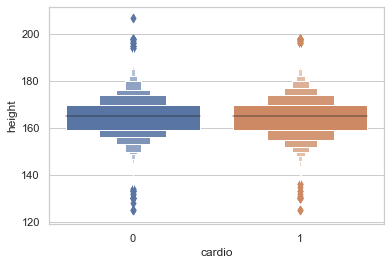

In [139]:
sns.boxenplot(data_cardio['cardio'],data_cardio['height'])
plt.show()

In [140]:
data_cardio.shape

(68536, 13)

In [141]:
data_cardio.drop('id',axis=1,inplace=True)

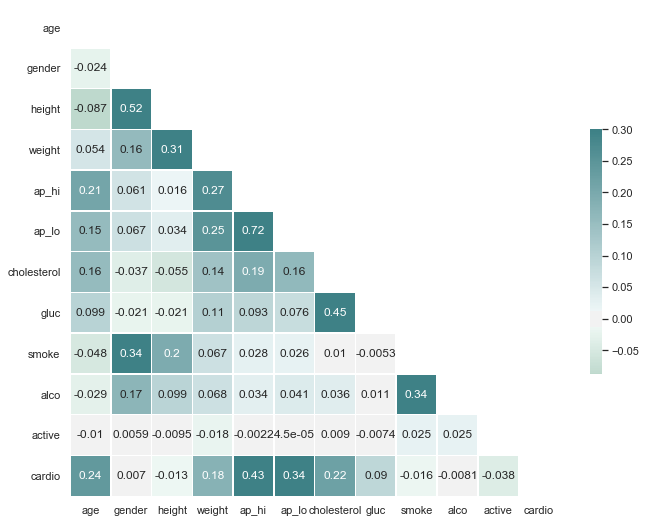

In [149]:
%matplotlib inline

sns.set(style="white")

#Matriz de correlacion
corr = data_cardio.corr()

# Máscara para la parte superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Dimensiones de la figura
f, ax = plt.subplots(figsize=(11, 9))

# color map
cmap = sns.diverging_palette(150, 200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True);